# Visualization of FordGo Bike System from January 2018 to June 2018
## by Abubakar Bello

## Investigation Overview

> In this presentation, I will compare the Age, Gender and User type to see how they affect the Ford GoBike System.

## Dataset Overview

> Ford GoBike is the Bay Area's bike share system. In 2017, Ford GoBike will reinvent bike share in the Bay Area with 7,000 bikes across San Francisco, the East Bay and San Jose. Ford GoBike is expected to become an essential part of the Bay Area's transportation network.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import glob
import os
import datetime
import math
from math import radians, sin, cos, acos
base_color = sb.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('ford_bikes_clean.csv')
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_month,start_week,start_hour,end_hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,1986,Male,No,34,January,Wed,22,19
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,3039,Customer,1996,Male,No,24,January,Wed,14,10
2,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,617,Subscriber,1991,Male,No,29,January,Wed,19,6
3,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,...,3571,Subscriber,1988,Male,No,32,January,Wed,23,0
4,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,1403,Subscriber,1980,Male,No,40,January,Wed,23,23


## FordGo Bike System Usage by Gender

> Majority of FordGo Bike System users based on usage by gender are Males, with 73.5% of the total users.

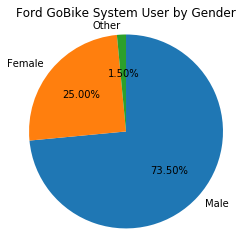

In [7]:
gender = df_clean['member_gender'].value_counts()

plt.pie(gender, labels = gender.index, startangle = 90, counterclock = False, autopct= '%1.2f%%');
plt.axis('square')
plt.title('Ford GoBike System User by Gender');

## FordGo Bike System Usage by User Type

> Majority of FordGo Bike users based on usage by user type are Suscribers with 89% of the total bike users.

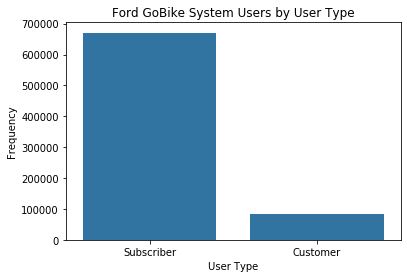

In [8]:
gen_order = df_clean['user_type'].value_counts().index
sb.countplot(data = df_clean, x = 'user_type', color = base_color, order = gen_order);
plt.xlabel('User Type');
plt.ylabel('Frequency');
plt.title("Ford GoBike System Users by User Type");

## FordGo Bike System Usage by Month

> Month of June is the most common month based on usage of FordGo Bike users.


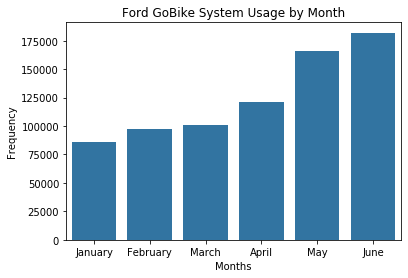

In [9]:
sb.countplot(data = df_clean, x = 'start_month', color = base_color);
plt.xlabel('Months');
plt.ylabel('Frequency');
plt.title("Ford GoBike System Usage by Month");

## FordGo Bike System Usage by User Type vs Week

>  Subcribers uses the FordGo Biking system than the Customers. Also, Subscribers uses the bikes mostly during working days than weekends.

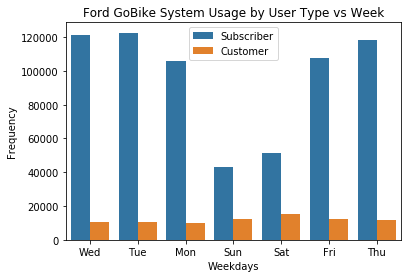

In [10]:
sb.countplot(data = df_clean, x = 'start_week', hue = 'user_type');
plt.title('Ford GoBike System Usage by User Type vs Week')
plt.xlabel('Weekdays')
plt.ylabel('Frequency');
plt.legend();

## FordGo Bike System Usage by User Type vs Month

>  June is the month in which both Subscribers and Customers of Ford Go Bike System use the bikes mostly.

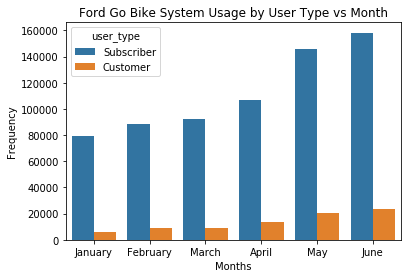

In [12]:
sb.countplot(data = df_clean, x = 'start_month', hue = "user_type");
plt.title('Ford Go Bike System Usage by User Type vs Month');
plt.xlabel('Months');
plt.ylabel('Frequency');

## FordGo Bike System Usage by Age and Week

> Most FordGo Bike users that use the biking system are between the age of 30 to 35 

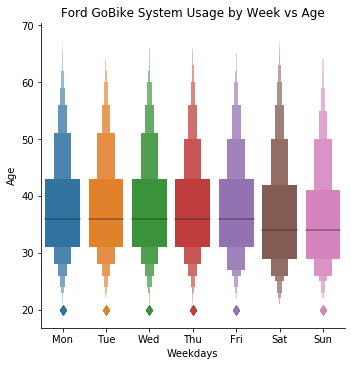

In [15]:
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
n_week = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_week'] = df_clean['start_week'].astype(n_week)

sb.catplot(x = "start_week", y = "member_age", kind = "boxen", data = df_clean);
plt.title('Ford GoBike System Usage by Week vs Age')
plt.xlabel('Weekdays')
plt.ylabel('Age');

## FordGo Bike System Usage by Age vs User Type vs Week

> Subscribers used the FordGo Biking System more than Customers. Most users of the biking system are between the age of 30 to 35.

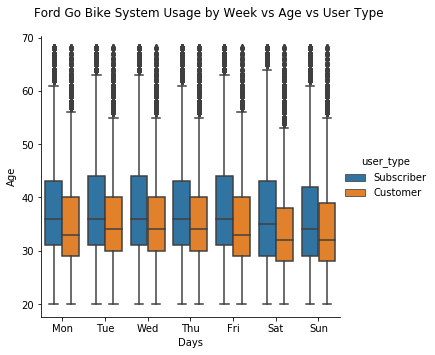

In [16]:
g = sb.catplot(x = "start_week", y = "member_age", hue = "user_type", kind = "box", data = df_clean);
g.set_axis_labels("Days", "Age")
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle('Ford Go Bike System Usage by Week vs Age vs User Type', y = 0.98);

## FordGo Bike System Usage by Month vs Gender vs User Type 

> Males use the FordGo Biking System more than the Females. Also, June is the most common month users used the bikes.

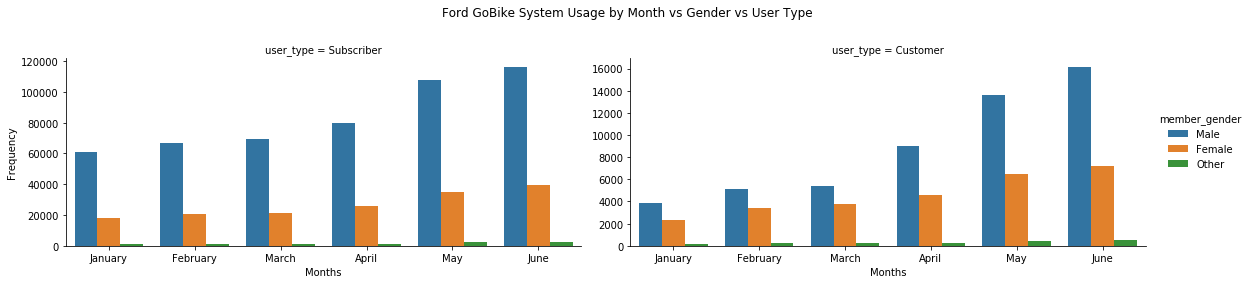

In [17]:
g = sb.catplot(x = "start_month", hue = "member_gender", col = "user_type", data = df_clean, kind = "count", height = 4, aspect = 2, sharey = False);
g.set_axis_labels("Months", "Frequency")
g.fig.subplots_adjust(top = 0.8)
g.fig.suptitle('Ford GoBike System Usage by Month vs Gender vs User Type', y = 0.98);

## FordGo Bike System Usage by Month vs Gender vs User Type vs Duration

> Males are the most users of the Ford Go Bike System for both Customers and Subscribers, followed by Females. Also, Month of June is the most common month for biking. Most users ride the bikes below 3000 seconds

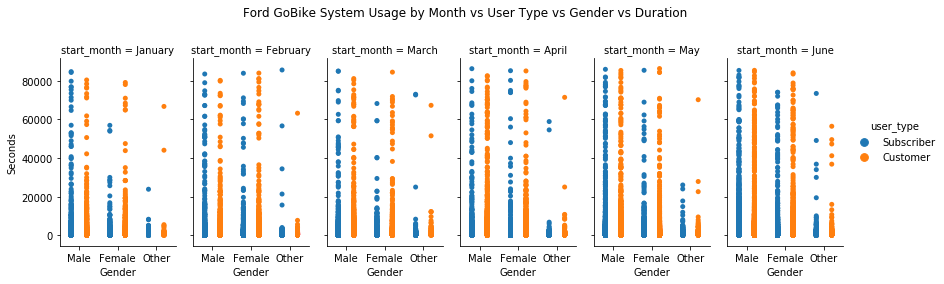

In [18]:
g = sb.catplot( x = "member_gender", y = "duration_sec", hue = "user_type", col = "start_month",
                data = df_clean, kind="strip", height=4, aspect=.5, jitter = False, dodge = True);
g.set_axis_labels("Gender", "Seconds");
g.fig.subplots_adjust(top = 0.8)
g.fig.suptitle('Ford GoBike System Usage by Month vs User Type vs Gender vs Duration', y = 0.98);

## FordGo Bike System Usage by Week vs User Type vs Duration (Seconds)

> Customers tend to have more duration than Subscribers. Also, durations are longer during weekend than weekdays

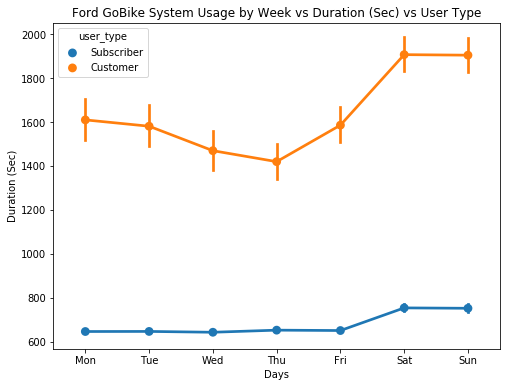

In [19]:
# FordGo Biking System Usage by Week vs Duration (Sec) vs User Type
fig = plt.figure(figsize = [8,6]);
g = sb.pointplot(data = df_clean, x = 'start_week', y = 'duration_sec', hue = 'user_type');
plt.title('Ford GoBike System Usage by Week vs Duration (Sec) vs User Type');
plt.xlabel('Days');
plt.ylabel('Duration (Sec)');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!